# E-commerce Businessess Analyze - Kmean Clustering 

### importing Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


### READ THE DATA 

In [3]:
data= pd.read_excel("cust_data.xlsx",index_col=0)
data.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


#### Data Types and Dimensions 

In [7]:
data.dtypes

Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal                     int64
Tommy Hilf

In [8]:
## shape 
data.shape

(30000, 37)

### Distribustion of variable 

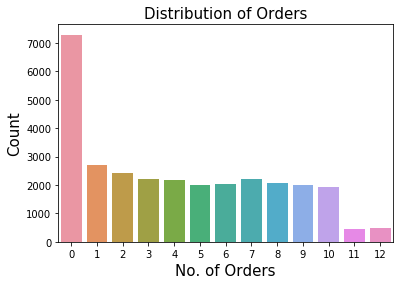

In [9]:
sns.countplot(data=data,x="Orders")
plt.title('Distribution of Orders', fontsize = 15)
plt.xlabel('No. of Orders', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

 it can be easily seen that most of the customer have no past orders 

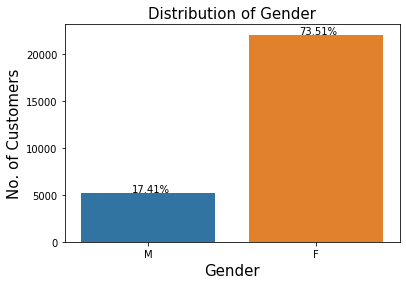

In [11]:
sns.countplot(data=data,x="Gender")
plt.title('Distribution of Gender', fontsize = 15)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# use below code to print the values in the graph
# 'x' and 'y' gives the position of the text
# 's' is the text 
plt.text(x = -0.1, y = data.Gender.value_counts()[1] + 20, s = str(round((data.Gender.value_counts()[1])*100/len(data.Gender),2)) + '%')
plt.text(x = 0.9, y = data.Gender.value_counts()[0] + 20, s = str(round((data.Gender.value_counts()[0])*100/len(data.Gender),2)) + '%')
plt.show()

 There are more female customer in the data than the male customer 

# statistical Summary 

In [12]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,27276,2,F,22054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Orders,30000,NaN,NaN,NaN,4.1698,3.59031,0,1,4,7,12
Jordan,30000,NaN,NaN,NaN,0.267433,0.804778,0,0,0,0,24
Gatorade,30000,NaN,NaN,NaN,0.252333,0.705368,0,0,0,0,15
Samsung,30000,NaN,NaN,NaN,0.222933,0.917494,0,0,0,0,27
Asus,30000,NaN,NaN,NaN,0.161333,0.740038,0,0,0,0,17
Udis,30000,NaN,NaN,NaN,0.143533,0.641258,0,0,0,0,14
Mondelez International,30000,NaN,NaN,NaN,0.139767,0.52584,0,0,0,0,31
Wrangler,30000,NaN,NaN,NaN,0.106933,0.515921,0,0,0,0,9
Vans,30000,NaN,NaN,NaN,0.111433,0.54799,0,0,0,0,16


# Missing data Treatment 

In [13]:
data.isnull().sum()

Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Hollister                    0
Forever 

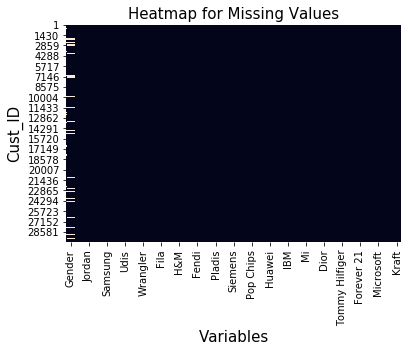

In [14]:
sns.heatmap(data.isnull(),cbar= False)
plt.title('Heatmap for Missing Values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Cust_ID', fontsize = 15)

plt.show()

Replace missing values in 'Gender'¶

'Gender' is a categorical variable with categories, 'M' and 'F'. We have 2724 customers whose gender is not known to us. To deal with this, we perform dummy encoding for the variable

In [15]:
# create dummies againt "gender"

data= pd.get_dummies(data,columns=["Gender"])
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


In [16]:
# checking the dimmension after dummy encoding 
data.shape

(30000, 38)

Gender_F' and 'Gender_M' are the two newly created variables that do not possess any missing value. The customer for which both the columns have '0' value indicates that the gender is not known

In [17]:
# recheck the null values 
data.isnull().sum()

Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix                 0
Kraft               

# Visulatization 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A5E67571C8>,
      dtype=object)

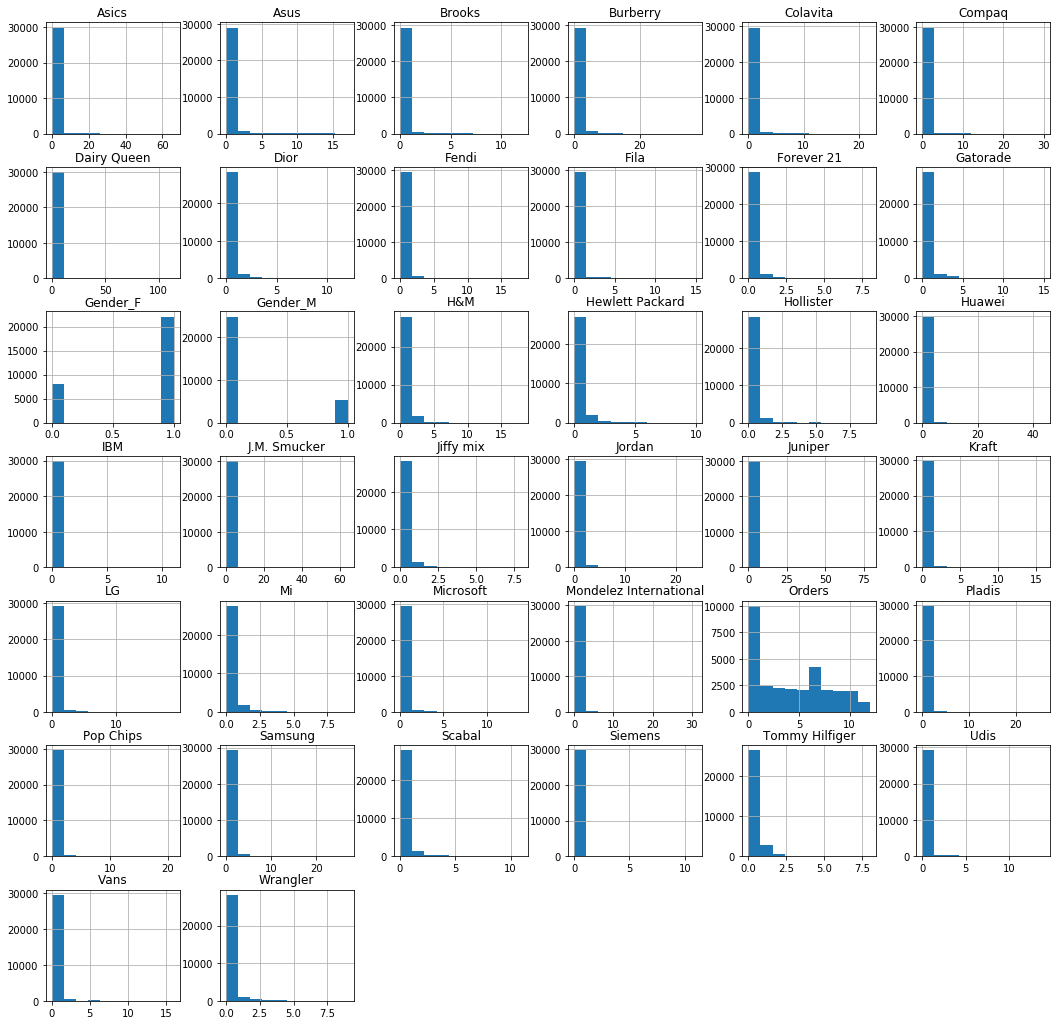

In [18]:
data. hist(figsize = (18,18))

In [19]:
df= data.copy()

In [20]:
df.shape

(30000, 38)

In [21]:
# X contain only brand name 
X= df.drop(["Orders","Gender_F","Gender_M"],axis=1)
X.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


# Scaleing the feature 

In [22]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(X)       

X = scale.transform(X) 

In [23]:
# createing a dataframe of the Scaled feature 

X_scaled= pd.DataFrame(X,columns=data.columns[1:36])

# head() to display top five rows
X_scaled.head()



,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


 we do not know how many cluster give thw most usefull results. So we create the cluster varying K , from 4 to 8 and then decide the optimal number pf cluster (K) with the help of the silhouette score 

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [32]:
# create a list for different values of  k
n_cluster = [2,3,4,5,6,7,8,9,10]
# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_cluster:
    cluster= KMeans (n_clusters=K,random_state=10)
    predict = cluster.fit_predict(X)
    
    score = silhouette_score(X,predict,random_state=10)
    print("for n_cluster={}, silhouette score is {}".format(K,score))
    


for n_cluster=2, silhouette score is 0.42440607570435307
for n_cluster=3, silhouette score is 0.2885321339337792
for n_cluster=4, silhouette score is 0.2780722342837258
for n_cluster=5, silhouette score is 0.2730575297310007
for n_cluster=6, silhouette score is 0.2131426812632072
for n_cluster=7, silhouette score is 0.2167528044506909
for n_cluster=8, silhouette score is 0.2045350958417542
for n_cluster=9, silhouette score is 0.19976302172923785
for n_cluster=10, silhouette score is 0.1935488684279912


	
The optimum value for K is associated with the high value of the 'silhouette score'. From the above output it can be seen that, for K = 4, the silhouette score is highest. Thus, we build the clusters with K = 4

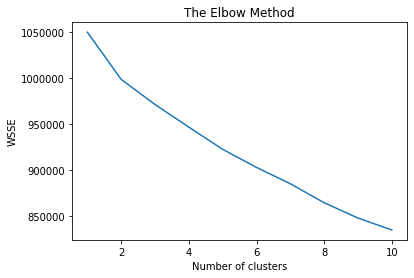

In [35]:
# using  the elbow method to find the optima number of cluster 
from sklearn.cluster import KMeans

wsse=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i , random_state= 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_) # inertia is stastic term for WSSE
plt.plot(range(1,11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()
    
    


In [36]:
print(wsse) # value for K 

[1050000.0, 998538.9353933898, 971226.3136613946, 946552.5609569486, 922338.3380975121, 902655.5167124649, 884826.0701552661, 864203.3175415436, 847445.7532508944, 834522.2021511928]


In [37]:
# Buliding a K-Menas model for K= 4 
model= KMeans(n_clusters=4, random_state=10)

model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

# Retrieve the Cluster 

As we have built the 4 clusters, now we want to know which customers belong to which cluster. 'model.labels_' can give the cluster number in which the customer belongs

In [40]:
data_output = data.copy()
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output["cluster"]= model.labels_

data_output.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,2


We have added a column 'cluster' in the dataframe describing the cluster number for each observation

In [41]:
### check the size of each cluster 

np.unique(model.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([22573,   561,  1267,  5599], dtype=int64))

In [42]:
data_output["cluster"].value_counts()

0    22573
3     5599
2     1267
1      561
Name: cluster, dtype: int64

In [49]:
data_output.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_F',
       'Gender_M', 'cluster'],
      dtype='object')

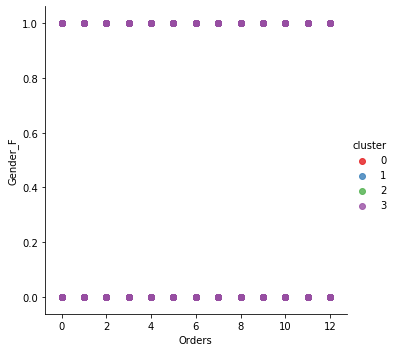

In [51]:
# checking cluster 
sns.lmplot(data=data_output,x="Orders",y="Gender_F",fit_reg=False,hue="cluster",palette="Set1")

# Cluster Centers

In [52]:
# form a dataframe containg cluster centers
# "cluster_centers_"return the co-ordinates of a cluster center 
center = pd.DataFrame(model.cluster_centers_,columns= data_output.columns[1:36])

In [53]:
center.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.157698,-0.154499,-0.086686,-0.116425,-0.122273,-0.095724,-0.114847,-0.071659,-0.038911,-0.121770,...,-0.087653,-0.163118,-0.237327,-0.146697,-0.144387,-0.123341,-0.074921,-0.069931,-0.079661,-0.082338
1,-0.135180,0.036494,-0.103099,-0.054216,-0.093185,0.015563,-0.107072,-0.135042,0.027216,-0.134709,...,-0.097200,-0.122480,-0.102487,-0.049512,-0.174694,-0.155421,-0.035646,0.026817,-0.099945,-0.090870
2,0.459146,0.477006,0.231876,0.169143,0.112182,0.256542,0.320526,0.384297,0.094377,0.806316,...,1.394111,0.628915,0.285262,1.149594,0.369751,0.437558,1.381482,0.799857,1.558608,1.902761
3,0.547185,0.512949,0.308330,0.437923,0.478411,0.327368,0.402509,0.216191,0.133222,0.323078,...,0.047987,0.529314,0.905386,0.337456,0.517602,0.415168,-0.006823,0.098670,-0.021376,-0.089536


Now, extract the variables in each of the clusters and try to name each of the cluster based on the variables

# Cluster Analysis

### Analysis of cluster-1

In [55]:
# sort the variable based on cluster center 
cluster_1 = sorted(zip(list(center.iloc[0,:]),list(center.columns)),reverse=True)[:10]

#### check the size of the cluster-1

In [56]:
np.unique(model.labels_,return_counts=True)[1][0]

22573

There are 22587 customers in this cluster. This is the largest cluster among all the clusters

#### Sort variable belonging to the cluster 

In [57]:
# retrieve the top 10 variables present in the cluster
cluster1_var = pd.DataFrame(cluster_1)[1]
cluster1_var

0                IBM
1               Fila
2    Hewlett Packard
3             Compaq
4              Fendi
5          Microsoft
6               Vans
7           Colavita
8          Jiffy mix
9              Kraft
Name: 1, dtype: object

Most of the customers belonging to this cluster have searched for electronics, apparels as well as grocery brands like HP, Apple, Prada, Reebok, Pillsbury, Bertolli, and so on. Thus, we can segment this cluster under 'Basket class'

In [60]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender_F', 'Gender_M', 'cluster']][data_output.cluster == 0].describe()

,Orders,Gender_F,Gender_M,cluster
count,22573.000000,22573.000000,22573.000000,22573.0
mean,4.097196,0.704470,0.197227,0.0
std,3.605273,0.456291,0.397914,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0
50%,4.000000,1.000000,0.000000,0.0
75%,7.000000,1.000000,0.000000,0.0
max,12.000000,1.000000,1.000000,0.0


The proportion of both male and female customers is proportionate in this cluster as compared to the overall gender proportion in the dataset

### Analysis of cluster-2

In [61]:
# sort the variable based on cluster center 
cluster_2 = sorted(zip(list(center.iloc[1,:]),list(center.columns)),reverse=True)[:10]

#### check the size of the cluster-2

In [62]:
np.unique(model.labels_,return_counts=True)[1][1]

561

There are 561 customers in this cluster. This is the smallest cluster among all the clusters

#### Sort variable belonging to the cluster 

In [63]:
# retrieve the top 10 variables present in the cluster
cluster2_var = pd.DataFrame(cluster_2)[1]
cluster2_var

0         Siemens
1           Asics
2    J.M. Smucker
3       Pop Chips
4          Huawei
5              Mi
6        Gatorade
7         Juniper
8          Compaq
9            Fila
Name: 1, dtype: object

It can be observed that most of the customers in this cluster have searched for electronics brands like Bosch, Samsung, OnePlus and so on. Thus, we can segment this cluster under 'Electronics'

In [64]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender_F', 'Gender_M', 'cluster']][data_output.cluster == 1].describe()

,Orders,Gender_F,Gender_M,cluster
count,561.000000,561.000000,561.000000,561.0
mean,4.406417,0.696970,0.212121,1.0
std,3.526263,0.459978,0.409175,0.0
min,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,0.000000,1.0
50%,4.000000,1.000000,0.000000,1.0
75%,7.000000,1.000000,0.000000,1.0
max,12.000000,1.000000,1.000000,1.0


This cluster contains highest male population among all the clusters. But, there is high deviation in both the genders

### Analysis of cluster-3

In [65]:
# sort the variable based on cluster center 
cluster_3 = sorted(zip(list(center.iloc[2,:]),list(center.columns)),reverse=True)[:10]

#### check the size of the cluster-3

In [66]:
np.unique(model.labels_,return_counts=True)[1][2]

1267

There are 1267 customers in this cluster. 

#### Sort variable belonging to the cluster 

In [67]:
# retrieve the top 10 variables present in the cluster
cluster3_var = pd.DataFrame(cluster_3)[1]
cluster3_var

0          Burberry
1            Pladis
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6         Pop Chips
7          Colavita
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

This cluster contains the customers who have searched for food brands like Nestle, Buskin-Robbin's, Pillsbury, and so on. Thus, we can segment this cluster under 'Grocery''

In [68]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender_F', 'Gender_M', 'cluster']][data_output.cluster == 2].describe()

,Orders,Gender_F,Gender_M,cluster
count,1267.000000,1267.000000,1267.000000,1267.0
mean,4.132597,0.820047,0.121547,2.0
std,3.631063,0.384300,0.326891,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,2.0
50%,4.000000,1.000000,0.000000,2.0
75%,7.000000,1.000000,0.000000,2.0
max,12.000000,1.000000,1.000000,2.0


It can be observed that there is a majority of female customers (with mean 0.82) in this cluster.

### Analysis of cluster-4

In [69]:
# sort the variable based on cluster center 
cluster_4 = sorted(zip(list(center.iloc[3,:]),list(center.columns)),reverse=True)[:10]

#### check the size of the cluster-4

In [70]:
np.unique(model.labels_,return_counts=True)[1][3]

5599

There are 5599 customers in this cluster. 

#### Sort variable belonging to the cluster 

In [71]:
# retrieve the top 10 variables present in the cluster
cluster4_var = pd.DataFrame(cluster_4)[1]
cluster4_var

0        Scabal
1        Jordan
2          Dior
3           H&M
4     Hollister
5      Gatorade
6        Huawei
7          Udis
8          Asus
9    Forever 21
Name: 1, dtype: object

This cluster contains the customers who have searched for clothing brands like Scabal, Jordan, Dior, H&M, and so on. Thus, we can segment this cluster under 'Apperals'

In [72]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
data_output[['Orders', 'Gender_F', 'Gender_M', 'cluster']][data_output.cluster == 3].describe()

,Orders,Gender_F,Gender_M,cluster
count,5599.000000,5599.000000,5599.000000,5599.0
mean,4.447223,0.843365,0.088766,3.0
std,3.512550,0.363489,0.284431,0.0
min,0.000000,0.000000,0.000000,3.0
25%,1.000000,1.000000,0.000000,3.0
50%,4.000000,1.000000,0.000000,3.0
75%,7.000000,1.000000,0.000000,3.0
max,12.000000,1.000000,1.000000,3.0


This cluster contains highest female population and lowest male population among all the clusters